In [80]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from mpl_toolkits.basemap import Basemap
from IPython.display import IFrame, Image, HTML, display, YouTubeVideo
%config InlineBackend.figure_format = 'svg'
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 9
%matplotlib inline
%pylab inline

#-------------------------------------------------------------------------------
csvfile=r'./Data/Brown bear Slovenia 1993-1999UTM.csv'
df = pd.read_csv(csvfile, low_memory=False)

#create time index
def createTimeIndex (row):
   index = row['timestamp'][:4]+row['timestamp'][5:7]+row['timestamp'][8:10]
   return int(index)
df['time_index'] = df.apply(lambda row: createTimeIndex (row),axis=1)

def createYear (row):
   index = row['timestamp'][:4]
   return int(index)
df['year'] = df.apply(lambda row: createYear (row),axis=1)

df['bear'] = df['individual-local-identifier']

#get unique bear names:
bears = set(list(df['individual-local-identifier']))


Populating the interactive namespace from numpy and matplotlib


kernel density based homerange for mishko in year 1994
kernel density based homerange for mishko in year 1995


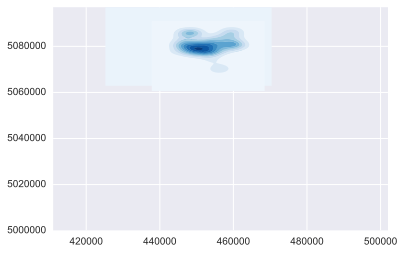

kernel density based homerange for ancka in year 1994
kernel density based homerange for ancka in year 1995
kernel density based homerange for ancka in year 1998


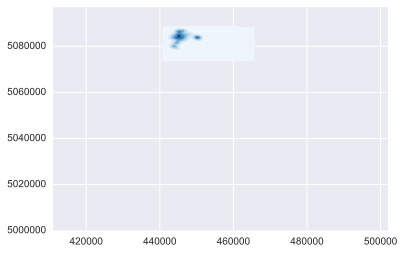

kernel density based homerange for milan in year 1995


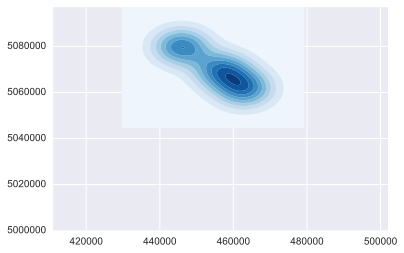

kernel density based homerange for clio in year 1994


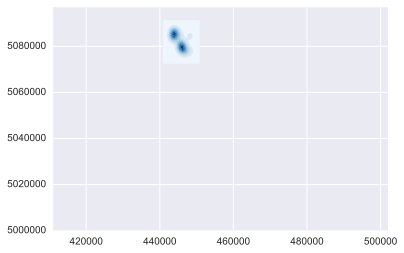

kernel density based homerange for klemen in year 1998


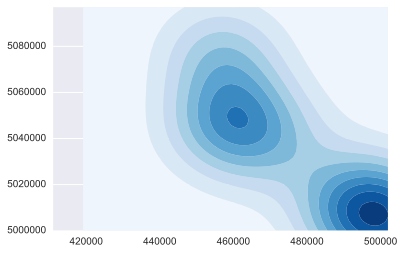

kernel density based homerange for vanja in year 1997


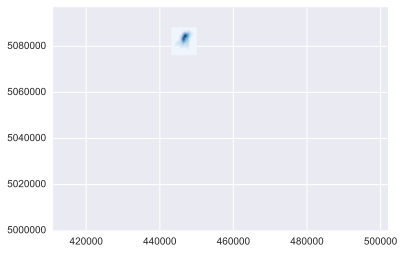

kernel density based homerange for srecko in year 1997


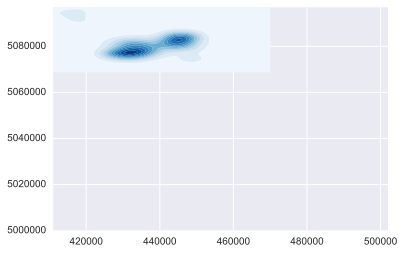

kernel density based homerange for jana in year 1993
kernel density based homerange for jana in year 1994


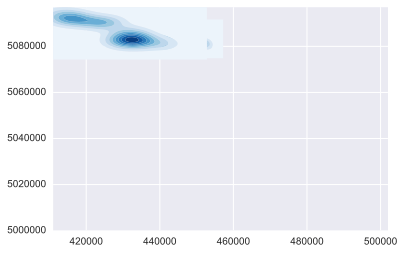

kernel density based homerange for polona in year 1998


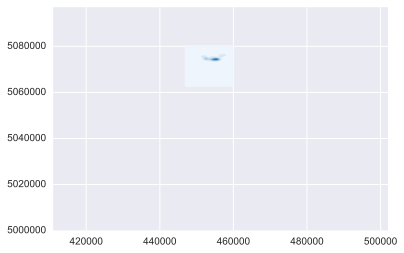

kernel density based homerange for urosh in year 1995


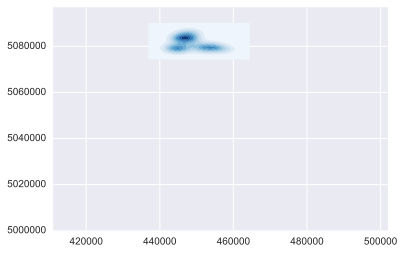

kernel density based homerange for lucia in year 1996
kernel density based homerange for lucia in year 1997


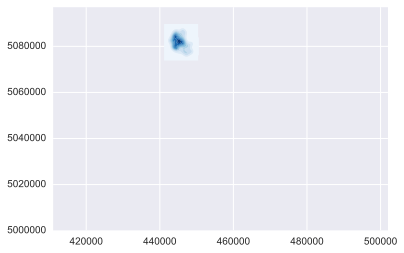

kernel density based homerange for vera in year 1996
kernel density based homerange for vera in year 1997


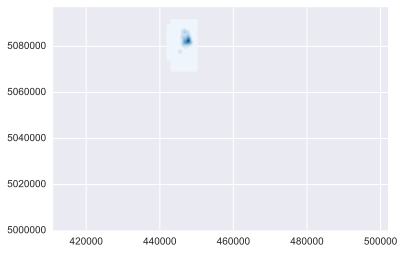

kernel density based homerange for ivan in year 1998


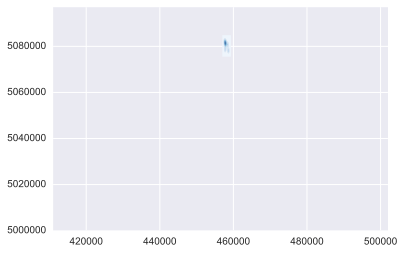

kernel density based homerange for nejc in year 1998


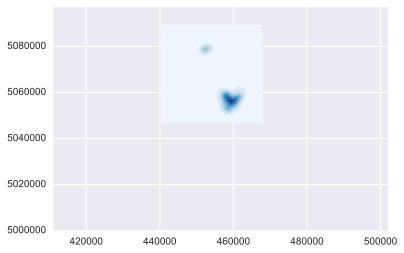

kernel density based homerange for jure in year 1994
kernel density based homerange for jure in year 1995


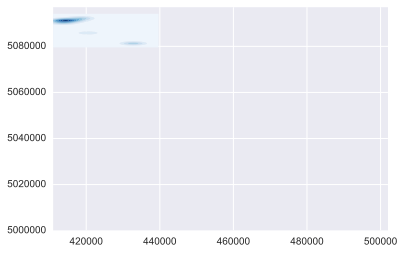

kernel density based homerange for maja in year 1995
kernel density based homerange for maja in year 1996
kernel density based homerange for maja in year 1997


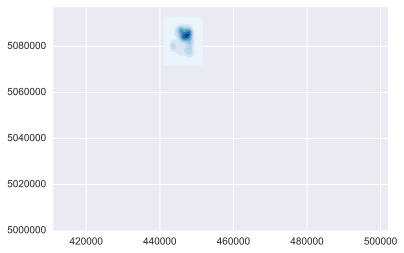

kernel density based homerange for dusan in year 1997


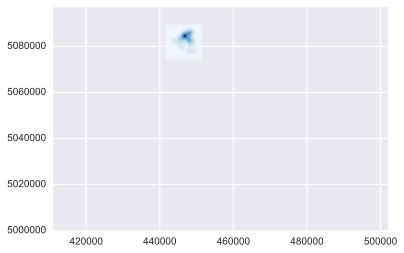

kernel density based homerange for dinko in year 1998


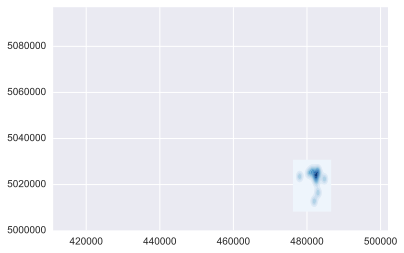

kernel density based homerange for metka in year 1994


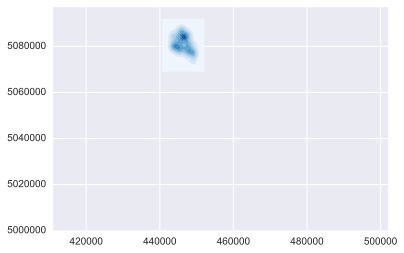

kernel density based homerange for vinko in year 1996
kernel density based homerange for vinko in year 1997


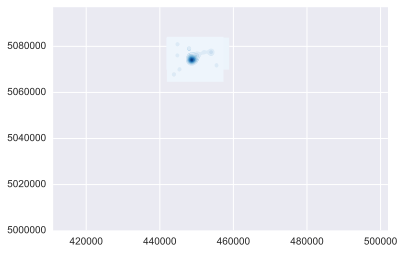

kernel density based homerange for joze in year 1998


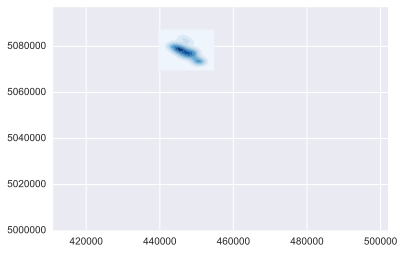

kernel density based homerange for janko in year 1994


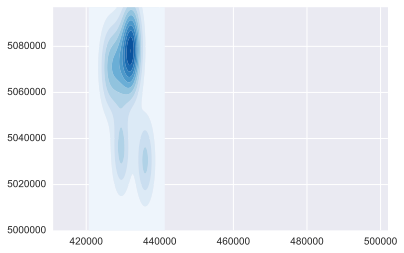

In [74]:
#print(min(np.array(df['utm-easting'].tolist())))
#print(max(np.array(df['utm-easting'].tolist())))
#print(min(np.array(df['utm-northing'].tolist())))
#print(max(np.array(df['utm-northing'].tolist())))

years =[19930000,19940000,19950000,19960000,19970000,19980000,19990000]

for bear in bears:
    
    df_subset = df[df['individual-local-identifier'] == bear]
    #fig, ax = plt.subplots()
    for i in range(1,len(years)):
        lowbound=years[i-1]
        hibound=years[i] 
        #print bear,lowbound,hibound
        df_subset2 = df_subset[((df_subset['time_index'] >= lowbound) & (df_subset['time_index'] < hibound))]
        #print(len(df_subset2.index))
        if len(df_subset2.index) > 0: #if mear was measured in current year
            eastings = np.array(df_subset2['utm-easting'].tolist())
            northings = np.array(df_subset2['utm-northing'].tolist())   
            print 'kernel density based homerange for '+bear+' in year',str(lowbound/10000)
            fig, ax = plt.subplots()
            kdens = sns.kdeplot(np.array(df_subset2['utm-easting'].tolist()), np.array(df_subset2['utm-northing'].tolist()), cmap="Blues", shade=True, legend=True)
            kdens.set(xlim=(411000, 502000))
            kdens.set(ylim=(5000100, 5097000))
            sns.plt.show()
    #sns.plt.show()

Measurement density for all bears in 1993-1999


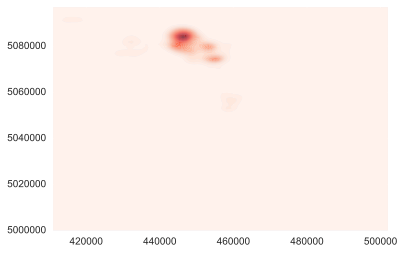

In [75]:
eastings = np.array(df['utm-easting'].tolist())
northings = np.array(df['utm-northing'].tolist())   
print 'Measurement density for all bears in 1993-1999'
fig, ax = plt.subplots()
kdens = sns.kdeplot(np.array(df['utm-easting'].tolist()), np.array(df['utm-northing'].tolist()), cmap="Reds", shade=True, legend=True, n_levels=30)
kdens.set(xlim=(411000, 502000))
kdens.set(ylim=(5000100, 5097000))
sns.plt.show()

(5000100, 5097000)

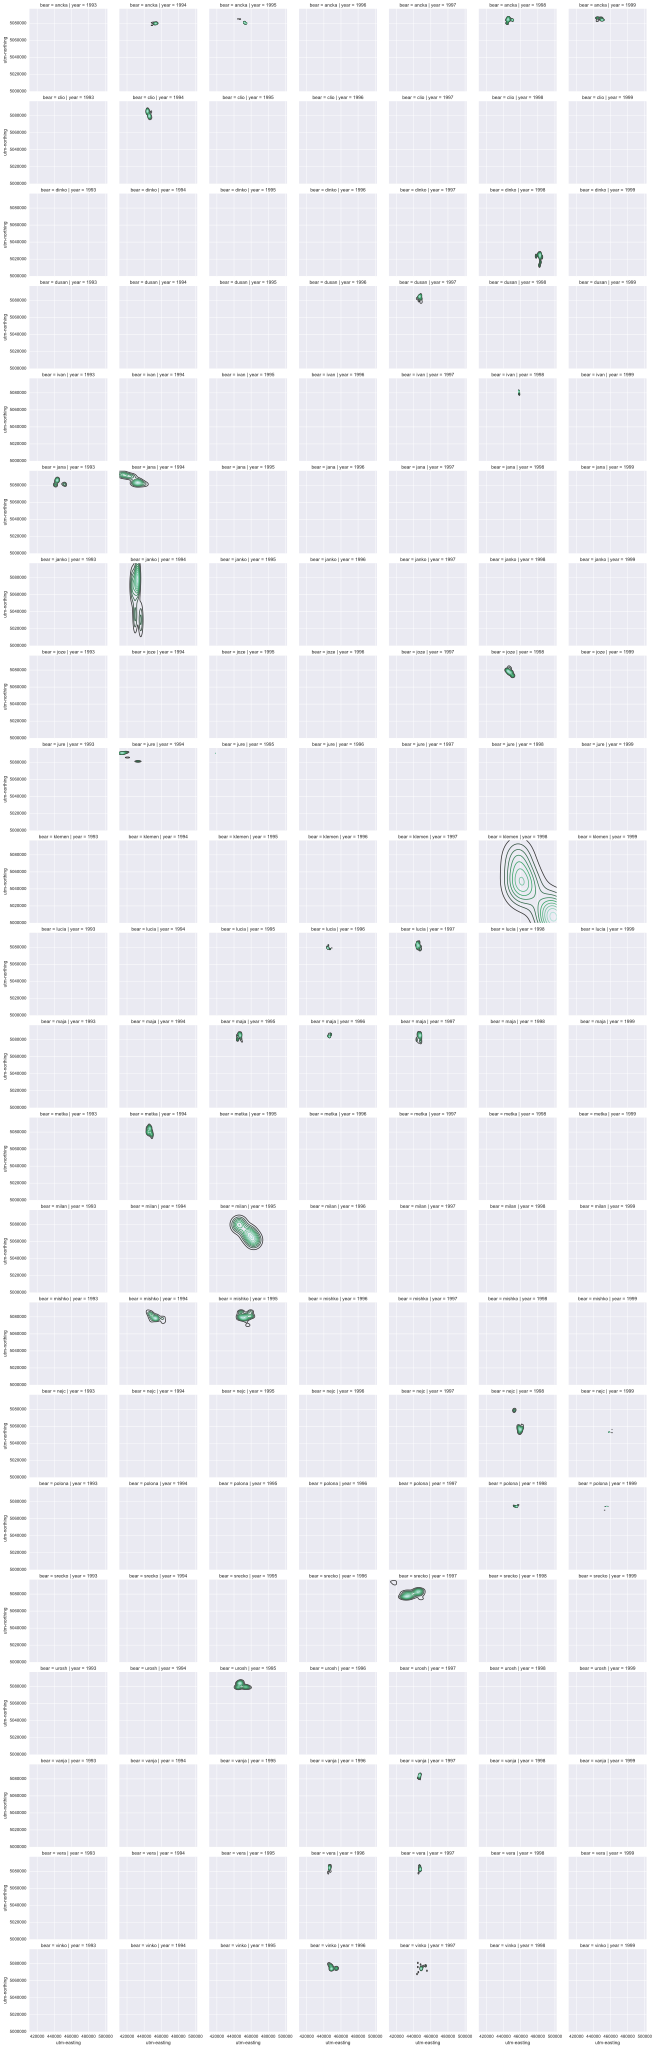

In [81]:
g = sns.FacetGrid(df, col="year", row='bear')  
g.map(sns.kdeplot, 'utm-easting', 'utm-northing')  
plt.xlim(411000, 502000)
plt.ylim(5000100, 5097000)
